In [1]:
import pandas as pd
import anndata as ad
import dynamo as dyn
import matplotlib.pyplot as plt

In [2]:
adata1 = ad.read_h5ad("../08_blastocyst/results/blastocyst_counts.gene_based.gene_name.annotated.filtered.h5ad")
adata2 = ad.read_h5ad("../08_blastocyst/results/scanpy_processed_gene_based.h5ad")
adata1.obs["CellType"] = adata2.obs["CellType"].copy()

In [21]:
adata = adata1.copy()
adata.layers["new"] = adata.layers["nascent"].copy()
adata = adata[(adata.obs["s4U"] == 400) & (adata.obs["Time"] == 3) & (adata.obs["ActD"].isna()) & (adata.obs["TC.Ratio"] >= 0.002)]
adata = adata[adata.obs["CellType"].isin(["TE-1", "TE-2", "muralTE", "polarTE"]), :]
print("Cells:", len(adata))
dyn.pp.recipe_monocle(adata, tkey="Time", experiment_type='one-shot')
dyn.tl.dynamics(adata)
dyn.tl.reduceDimension(adata)
dyn.tl.leiden(adata)
dyn.tl.hdbscan(adata)
dyn.tl.louvain(adata)
if True:
    lineage_dict = {"TE-1": ["muralTE", "polarTE"]}
    dyn.tl.gene_wise_confidence(adata, group='CellType', lineage_dict=lineage_dict, ekey="M_t", vkey="velocity_T")
    adata = adata[:,(adata.var["avg_prog_confidence"] > 0.2) & (adata.var["avg_mature_confidence"] > 0.5)]
dyn.tl.cell_velocities(adata, calc_rnd_vel=True, transition_genes=adata.var_names)
dyn.vf.VectorField(adata, basis='umap')

Cells: 747
|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...


/home/chenzonggui/tmp/ipykernel_3658/2771613303.py:6: DeprecationWarning: recipe_monocle is deprecated and will be removed in a future release. Please update your code to use the new replacement function.
  dyn.pp.recipe_monocle(adata, tkey="Time", experiment_type='one-shot')
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/dynamo/preprocessing/deprecated.py:1162: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["pp"] = {}


|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> detected experiment type: one-shot
|-----> filtering cells...
|-----> 747 cells passed basic filters.
|-----> filtering gene...
|-----> 10827 genes passed basic filters.
|-----> calculating size factor...
|-----> selecting genes in layer: X, sort method: SVR...
|-----> size factor normalizing the data, followed by log1p transformation.
|-----> Set <adata.X> to normalized data
|-----> applying PCA ...
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> cell cycle scoring...
|-----> computing cell phase...
|-----> [Cell Phase Estimation] completed [1346.6579s]
|-----> [Cell Cycle Scores Estimation] completed [0.0941s]
|-----> [recipe_monocle preprocess] completed [14.8321s]
|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|--

/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/dynamo/preprocessing/utils.py:730: RuntimeWarning: invalid value encountered in divide
  var_ntr = adata.layers["new"].sum(0) / adata.layers["total"].sum(0)


|-----> [moments calculation] completed [7.8755s]
|-----? Your adata only has labeling data, but `NTR_vel` is set to be `False`. Dynamo will reset it to `True` to enable this analysis.


estimating gamma: 100%|██████████| 2000/2000 [00:30<00:00, 64.86it/s]


|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [9.9018s]
|-----> accessing adj_matrix_key=connectivities built from args for clustering...
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> Detecting communities on graph...
|-----------> Converting graph_sparse_matrix to igraph object
|-----> [Community clustering with leiden] completed [1426.2617s]
|-----> [hdbscan density-based-clustering] completed [0.0710s]
|-----> accessing adj_matrix_key=connectivities built from args for clustering...
|-----> Detecting communities on graph...
|-----------> Converting graph_sparse_matrix to igraph object
|-----? louvain is not maintained, we recommend

calculating gene velocity vectors confidence based on phase portrait location with priors of progenitor/mature cell types: 2000it [00:15, 127.34it/s]
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/dynamo/tools/metric_velocity.py:436: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg = confidence.groupby("gene")["prog_confidence", "mature_confidence"].mean()


|-----? A new set of transition genes is used, but because enforce=False, the transition matrix might not be recalculated if it is found in .obsp.


/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/dynamo/tools/cell_velocities.py:262: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["use_for_transition"] = False


|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via pearson kernel with sqrt transform.] completed [2.9954s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.4551s]
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via pearson kernel with sqrt transform.] completed [2.8093s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.3986s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector fi

|-----------> plotting with basis key=X_umap
|-----------> skip filtering CellType by stack threshold when stacking color because it is not a numeric type


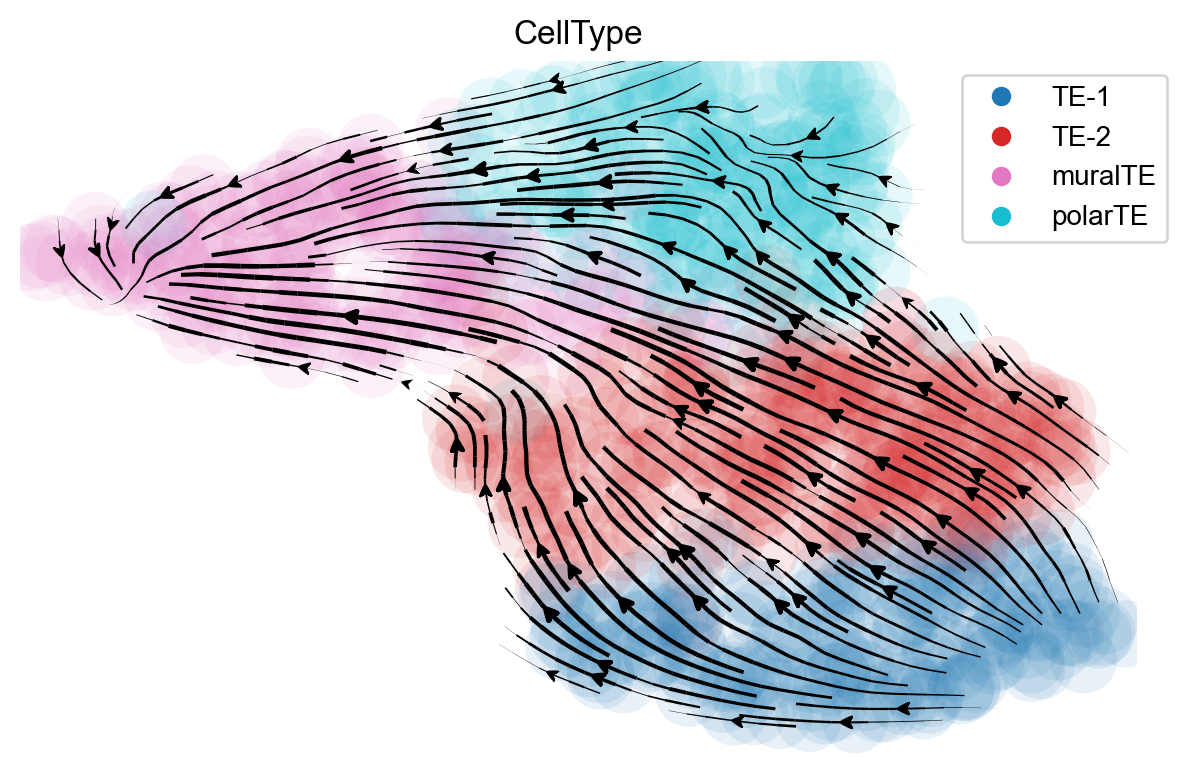

In [25]:
dyn.pl.streamline_plot(adata, color='CellType', color_key_cmap='tab10', basis='umap', show_legend='right', save_show_or_return='show')
# dyn.pl.streamline_plot(adata, color='leiden', color_key_cmap='tab10', basis='umap', show_legend='right', save_show_or_return='show')
# dyn.pl.streamline_plot(adata, color='louvain', color_key_cmap='tab10', basis='umap', show_legend='right', save_show_or_return='show')

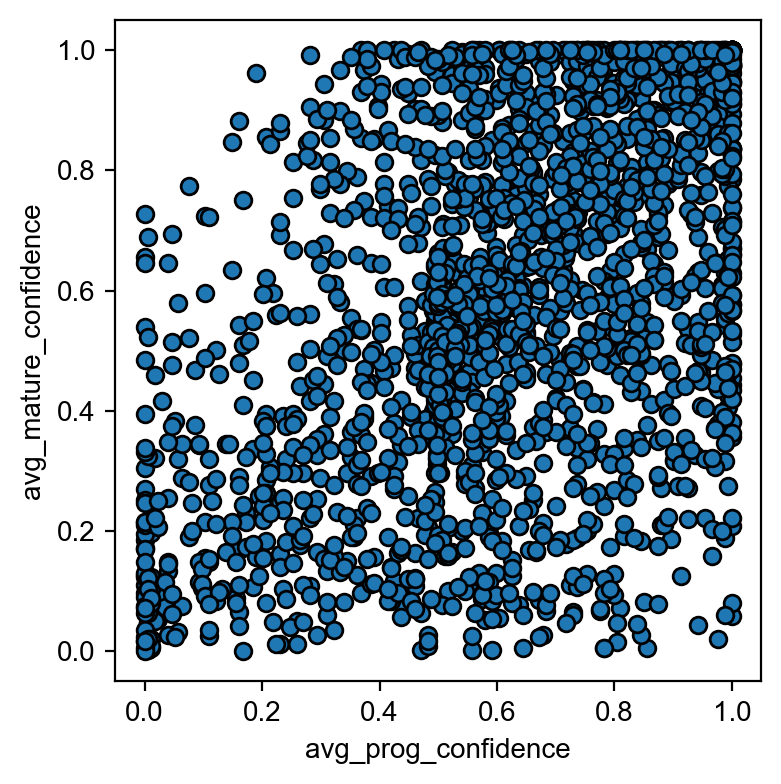

In [5]:
tmp = adata.var
tmp = tmp[tmp["use_for_transition"]]
tmp.sort_values(by="avg_mature_confidence")
xs, ys = tmp["avg_prog_confidence"], tmp["avg_mature_confidence"]
plt.figure(figsize=(4, 4))
plt.scatter(xs, ys, edgecolor="black")
plt.xlabel("avg_prog_confidence")
plt.ylabel("avg_mature_confidence")
plt.tight_layout()
plt.show()

In [8]:
tmp1 = tmp[(tmp["avg_prog_confidence"] > 0.9) & (tmp["avg_mature_confidence"] > 0.9)]
tmp1

,GeneID,GeneType,Chrom,Start,End,Strand,nCells,nCounts,pass_basic_filter,log_m,...,sl0,U0,S0,total0,beta_k,gamma_k,use_for_dynamics,avg_prog_confidence,avg_mature_confidence,use_for_transition
GeneName,,,,,,,,,,,,,,,,,,,,,
Lck,ENSMUSG00000000409.14,protein_coding,chr4,129548343.0,129573641.0,-,37,44.0,True,-4.390364,...,None,None,None,None,None,1.566513,True,0.971264,0.906938,True
Tulp3,ENSMUSG00000001521.12,protein_coding,chr6,128321160.0,128355851.0,-,57,69.0,True,-3.737006,...,None,None,None,None,None,2.739594,True,0.982759,1.000000,True
Pwp1,ENSMUSG00000001785.13,protein_coding,chr10,85829493.0,85889096.0,+,188,276.0,True,-1.780986,...,None,None,None,None,None,0.989995,True,0.902299,0.947583,True
Slc39a13,ENSMUSG00000002105.15,protein_coding,chr2,91061790.0,91070417.0,-,24,31.0,True,-5.110558,...,None,None,None,None,None,1.491043,True,0.948276,1.000000,True
Grik5,ENSMUSG00000003378.9,protein_coding,chr7,25009848.0,25072346.0,-,13,13.0,True,-5.765950,...,None,None,None,None,None,2.395613,True,1.000000,0.910781,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm43323,ENSMUSG00000107390.1,TEC,chr5,66080208.0,66084466.0,-,20,21.0,True,-5.346091,...,None,None,None,None,None,2.068089,True,0.965517,1.000000,True
Gm48226,ENSMUSG00000112302.1,bidirectional_promoter_lncRNA,chr12,78222285.0,78226525.0,-,18,20.0,True,-5.428678,...,None,None,None,None,None,4.249577,True,1.000000,1.000000,True
Gm7240,ENSMUSG00000113626.1,transcribed_processed_pseudogene,chr13,61804256.0,61861675.0,+,134,185.0,True,-2.231195,...,None,None,None,None,None,1.290045,True,0.913793,0.994253,True


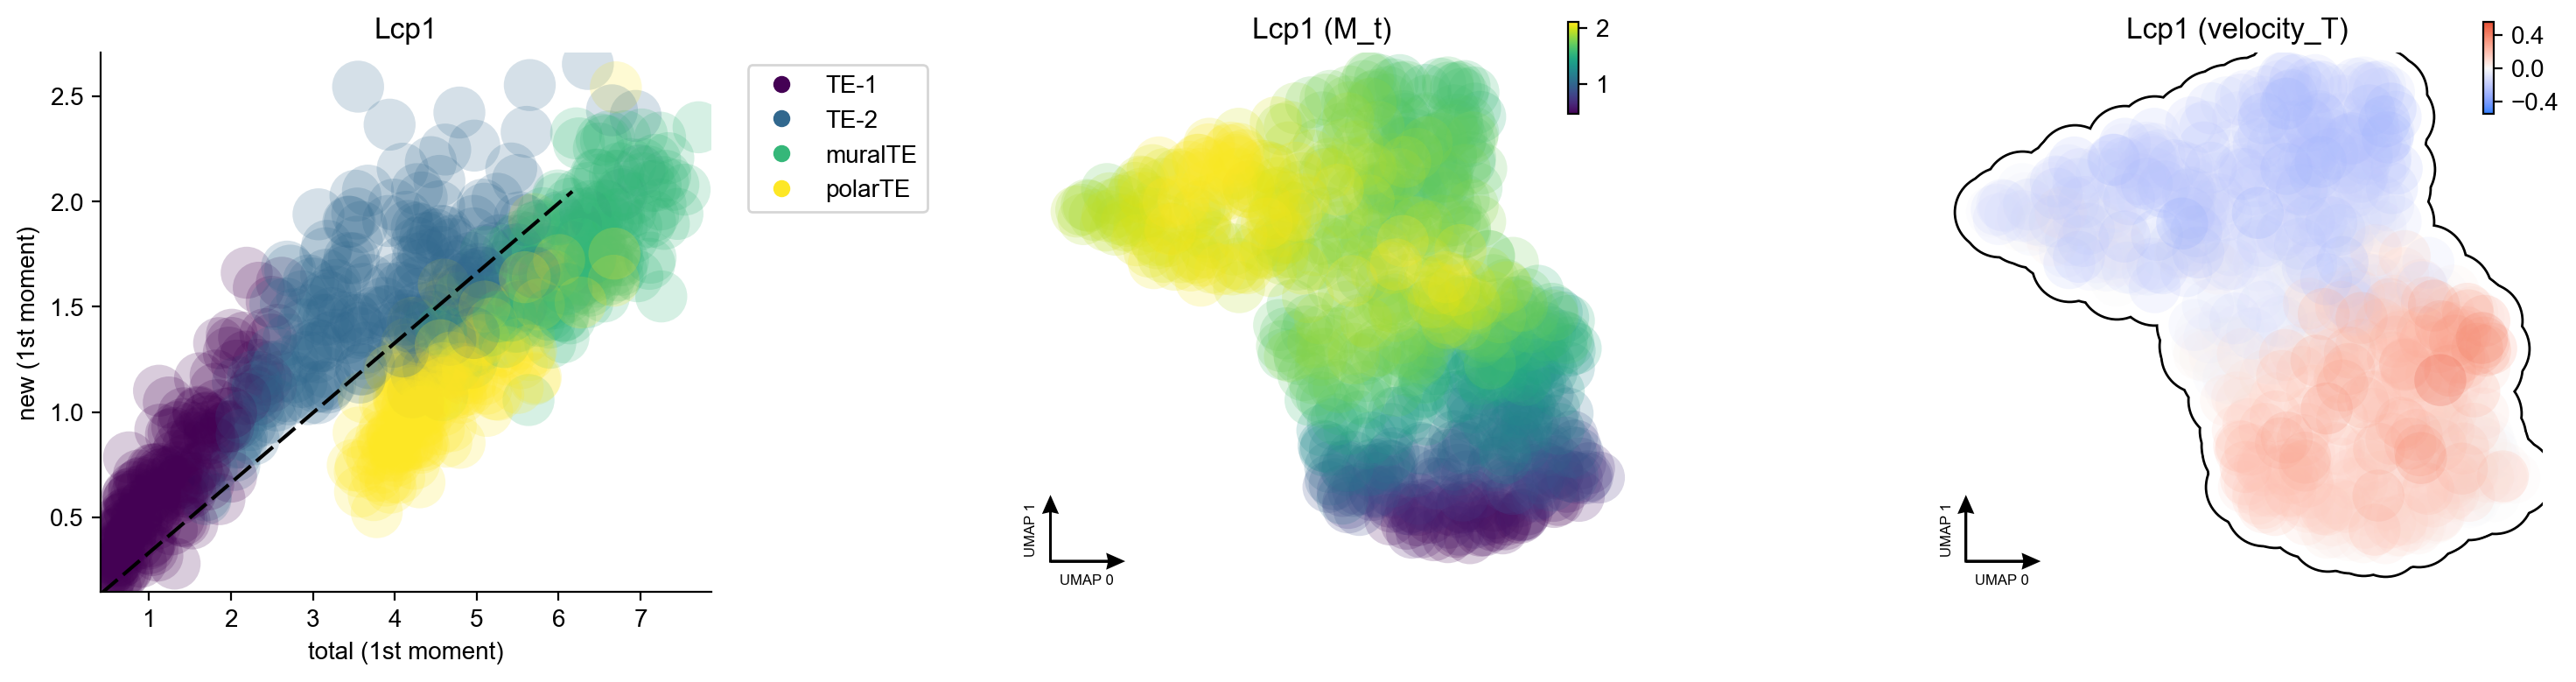

In [12]:
gene_list = tmp1.index.values[:10]
gene_list = ["Lcp1"]
dyn.pl.phase_portraits(adata, genes=gene_list, color='CellType',  
                       discrete_continous_div_color_key=[None, None, None], 
                       discrete_continous_div_color_key_cmap=['viridis', None, None], ncols=6, pointsize=5)

In [13]:
adata

AnnData object with n_obs × n_vars = 747 × 28794
    obs: 'Run', 'Barcode', 'Species', 's4U', 'Time', 'ActD', 'Group', 'CellLine', 'Stage', 'Platform', 'Label', 'UMI', 'Cells', 'LibStruct', 'Remark', 'Cell.Reads', 'Trimmed.Reads', 'Trimmed.Ratio', 'Mapped.Reads', 'Mapped.Ratio', 'Mito.Ratio', 'Filtered.Reads', 'Filtered.Ratio', 'FilteredClip.Reads', 'FilteredClip.Ratio', 'UMIs', 'UMIs.2Reads', 'Duplicate.Reads', 'Duplicate.Ratio', 'Unique.Reads', 'Genes', 'Isoforms.Assembled', 'Isoforms.Known', 'AC.Ratio', 'AG.Ratio', 'AT.Ratio', 'CA.Ratio', 'CG.Ratio', 'CT.Ratio', 'GA.Ratio', 'GC.Ratio', 'GT.Ratio', 'TA.Ratio', 'TC.Ratio', 'TG.Ratio', 'Pe', 'Pc', 'PcPe.Ratio', 'UMIs.2Reads.Nascent.2TCs', 'UMIs.2Reads.Nascent.2TCs.Ratio', 'Genes.2Reads', 'Genes.2Reads.Nascent.2TCs', 'CellType', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'new_Size_Factor', 'initial_new_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'leid

In [45]:
progenitor = adata.obs_names[adata.obs["CellType"] == "TE-1"]
info_genes = adata.var_names[adata.var["use_for_transition"]]
dyn.pd.fate(adata, basis='umap', init_cells=progenitor, interpolation_num=100,  direction='forward', inverse_transform=False, average=False)

uniformly sampling points along a trajectory: 100%|██████████| 256/256 [00:01<00:00, 151.71it/s]


AnnData object with n_obs × n_vars = 1260 × 1119
    obs: 'Run', 'Barcode', 'Species', 's4U', 'Time', 'ActD', 'Group', 'CellLine', 'Stage', 'Platform', 'Label', 'UMI', 'Cells', 'LibStruct', 'Remark', 'Cell.Reads', 'Trimmed.Reads', 'Trimmed.Ratio', 'Mapped.Reads', 'Mapped.Ratio', 'Mito.Ratio', 'Filtered.Reads', 'Filtered.Ratio', 'FilteredClip.Reads', 'FilteredClip.Ratio', 'UMIs', 'UMIs.2Reads', 'Duplicate.Reads', 'Duplicate.Ratio', 'Unique.Reads', 'Genes', 'Isoforms.Assembled', 'Isoforms.Known', 'AC.Ratio', 'AG.Ratio', 'AT.Ratio', 'CA.Ratio', 'CG.Ratio', 'CT.Ratio', 'GA.Ratio', 'GC.Ratio', 'GT.Ratio', 'TA.Ratio', 'TC.Ratio', 'TG.Ratio', 'Pe', 'Pc', 'PcPe.Ratio', 'UMIs.2Reads.Nascent.2TCs', 'UMIs.2Reads.Nascent.2TCs.Ratio', 'Genes.2Reads', 'Genes.2Reads.Nascent.2TCs', 'CellType', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'cell_cycle_phase', 'leid

In [20]:
adata.layers["M_tt"].toarray()

array([[1.22775782e+00, 4.14599371e-01, 0.00000000e+00, ...,
        0.00000000e+00, 9.21258380e-02, 1.84005823e-01],
       [6.74127864e-01, 5.28530114e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.67278021e-01],
       [4.48207636e-01, 2.25836545e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.11512323e-02],
       ...,
       [9.17217803e-01, 1.22253209e-02, 1.14791187e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.22471140e-01],
       [5.22769464e-01, 0.00000000e+00, 3.07883446e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.02391899e-01],
       [9.77328992e-01, 1.25234994e-02, 5.93027594e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.25234994e-02]])

In [46]:
fig, ax = plt.subplots()
ax = dyn.pl.topography(adata, color='CellType', ax=ax, save_show_or_return='return', basis='umap')
dyn.mv.animate_fates(adata, color='time', basis='umap', n_steps=100, 
                     fig=fig, ax=ax, save_show_or_return='save', 
                     logspace=True, max_time=None, save_kwargs={"filename": 'figures/te.gif'})

|-----> Vector field for umap is but its topography is not mapped. Mapping topography now ...
|-----------> plotting with basis key=X_umap
|-----------> skip filtering CellType by stack threshold when stacking color because it is not a numeric type
|-----? the number of cell states with fate prediction is more than 50. You may want to lower the max number of cell states to draw via cell_states argument.


/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/dynamo/plot/topography.py:520: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x7fe8300743a0>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/dynamo/plot/topography.py:520: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  ax.scatter(
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/dynamo/plot/topography.py:520: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x7fe82896fac0>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
